# Exploring Air Force personnel data

**Aim**:  exploring US Department of Defense personnel demographics dataset. 

**Dataset**: The publicly available dataset was taken [from data.gov](https://catalog.data.gov/dataset/personnel-trends-by-gender-race), and has been cleaned and tidied, so you can get straight into exploratory data analysis.

* The dataset contains counts of military personnel by gender, race, and paygrade. It was compiled in March 2010.

The dataset has 6 columns.

- **service**: Army, Navy, Marine Corps, Air Force, Coast Guard. (Space Force didn't exist when the dataset was compiled.)
- **gender**: MALE or FEMALE.
- **race**: AMI/ALN, ASIAN, BLACK, MULTI, P/I, WHITE, UNK.
- **hispanicity**: HISP, NON-HISP.
- **paygrade**: Enlisted grades E00 to E09, Warrant Officer grades W01 to W05, Officer grades O01 to O10.
- **count**: number of personnel in that demographic.

## 1: Import the packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

---------

## 2: Read in the dataset

In [6]:
# Import the demographic data from "dod_demographics.csv"
dod_demographics = pd.read_csv("dod_demographics.csv")

# See the result
dod_demographics.head()

,service,gender,race,hispanicity,paygrade,count
0,Army,MALE,AMI/ALN,HISP,O01,2
1,Army,MALE,AMI/ALN,NON-HISP,O01,38
2,Army,MALE,ASIAN,HISP,O01,0
3,Army,MALE,ASIAN,NON-HISP,O01,361
4,Army,MALE,BLACK,HISP,O01,18


### A Short look to Dataset
* 5 variables are object types , 1 variable is integer type
* there is no any null value
* paygrade variable has 25 unique value, so it is object but cardinal variable

In [8]:
print("variables info")
display(dod_demographics.info())

print("******************************")
print("is there any null?")
display(dod_demographics.isna().any())

print("******************************")
print("describe objects")
display(dod_demographics.describe(include='object').T)

variables info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   service      3248 non-null   object
 1   gender       3248 non-null   object
 2   race         3248 non-null   object
 3   hispanicity  3248 non-null   object
 4   paygrade     3248 non-null   object
 5   count        3248 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 152.4+ KB


None

******************************
is there any null?


service        False
gender         False
race           False
hispanicity    False
paygrade       False
count          False
dtype: bool

******************************
describe objects


,count,unique,top,freq
service,3248,5,Army,700
gender,3248,2,MALE,1624
race,3248,7,AMI/ALN,464
hispanicity,3248,2,HISP,1624
paygrade,3248,25,O01,140


### Categoric Columns

In [11]:
# saving categoric columns as a list
categoric_col = [ i for i in dod_demographics.columns \
                 if dod_demographics[i].dtypes == "object" and \
                 dod_demographics[i].nunique() < 10] 

# See the result
categoric_col

['service', 'gender', 'race', 'hispanicity']

In [21]:
# unique values in categorics
for i in categoric_col:
    display(dod_demographics[i].unique())

array(['Army', 'Navy', 'Marine Corps', 'Air Force', 'Coast Guard'],
      dtype=object)

array(['MALE', 'FEMALE'], dtype=object)

array(['AMI/ALN', 'ASIAN', 'BLACK', 'MULTI', 'P/I', 'WHITE', 'UNK'],
      dtype=object)

array(['HISP', 'NON-HISP'], dtype=object)

--------

## 3: Get the subset with the Air Force dataset

* The dataset contains data for all the services, but we only want to analyze the Air Force data.

In [12]:
# First way is; for rows in the "Air Force" service
air_force = dod_demographics[dod_demographics["service"] == "Air Force"]

# Second way is; choose "Air Force" using "query" method
air_force = dod_demographics.query('service == "Air Force"')

# See the results
air_force

,service,gender,race,hispanicity,paygrade,count
840,Air Force,MALE,AMI/ALN,HISP,O01,0
841,Air Force,MALE,AMI/ALN,NON-HISP,O01,36
842,Air Force,MALE,ASIAN,HISP,O01,2
843,Air Force,MALE,ASIAN,NON-HISP,O01,252
844,Air Force,MALE,BLACK,HISP,O01,6
...,...,...,...,...,...,...
2655,Air Force,FEMALE,P/I,NON-HISP,E09,1
2656,Air Force,FEMALE,WHITE,HISP,E09,1
2657,Air Force,FEMALE,WHITE,NON-HISP,E09,160
2658,Air Force,FEMALE,UNK,HISP,E09,3


-----------------

## 4: Start exploring! How much data do we have?

* Group air_force by "gender" and calculate the sum of the "count".

In [13]:
# How many people are there in air force as grouped by gender
air_force.groupby("gender").sum()

,count
gender,
FEMALE,64200
MALE,267286


Let's visualize these total counts using a bar plot. **Plotly prefers to have all variables in the plot as columns in the dataframe, so we need an additional step of reseting the index**.

In [14]:
# Redo the previous analysis, then reset the index.
total_counts_by_gender = air_force.groupby("gender").sum().reset_index()

# See the result
total_counts_by_gender

,gender,count
0,FEMALE,64200
1,MALE,267286


### Using total_counts, draw a bar plot of count versus categoric variables.

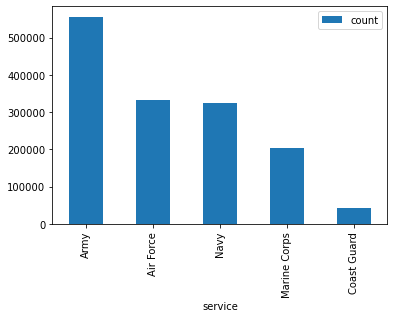

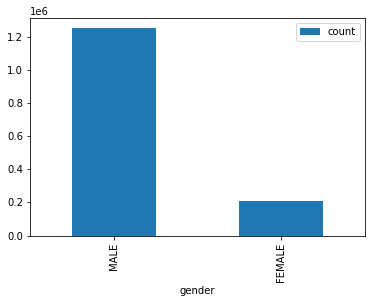

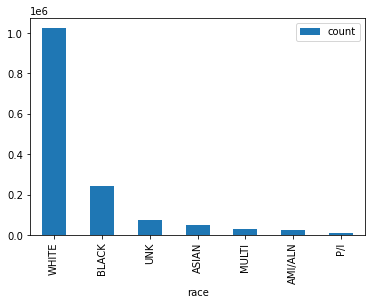

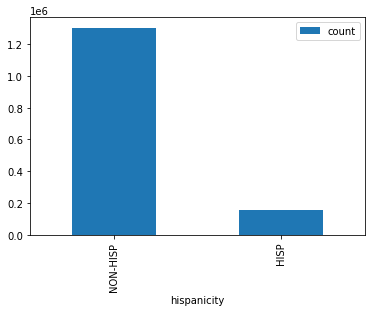

In [31]:
# matplotlib bar graphs

for i in categoric_col:
    total_counts = dod_demographics.groupby(i).sum().reset_index().sort_values("count", ascending=False)
    total_counts.plot(kind="bar",x = i, y = "count")



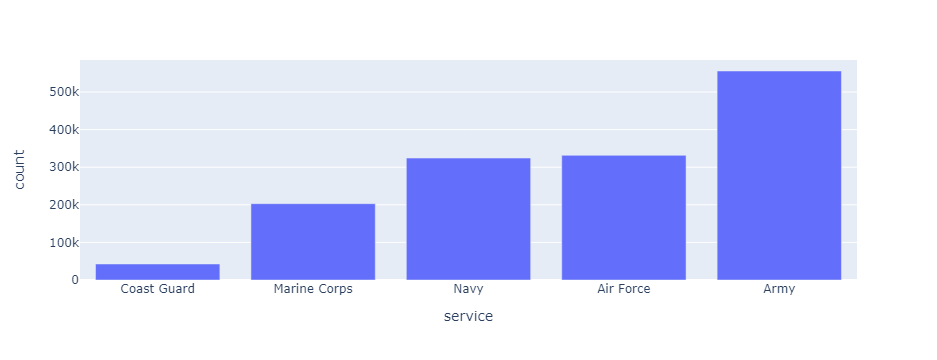

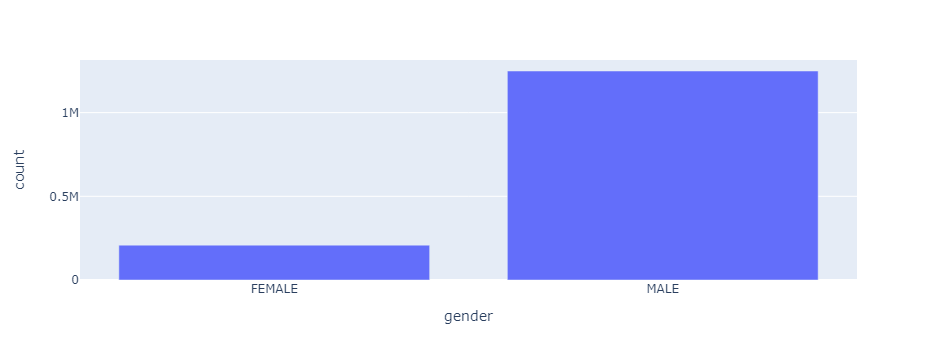

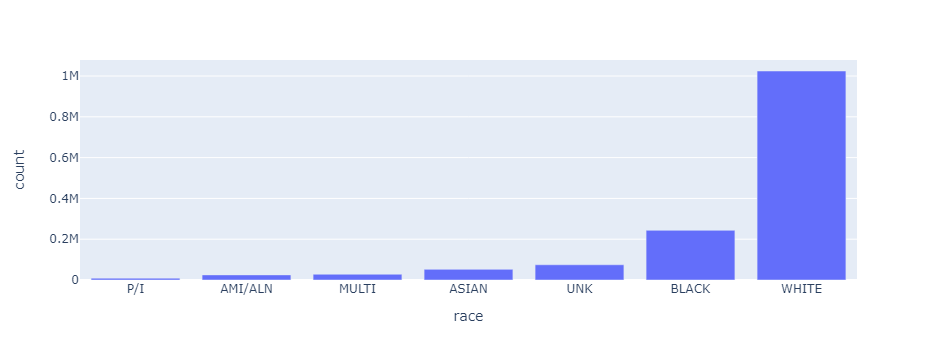

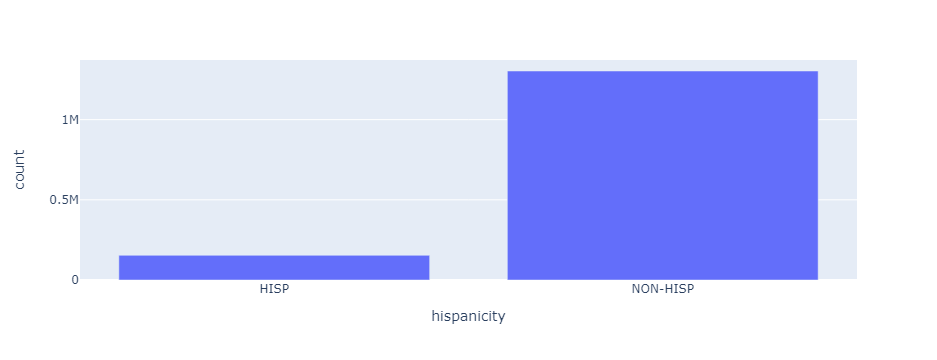

In [32]:
# plotly bar graphs
for i in categoric_col:

    total_counts = dod_demographics.groupby(i).sum().reset_index().sort_values("count")
    fig = px.bar( total_counts,x = i, y = "count")
    fig.show()

## 6: Exploring the highest paygrades by group

Let's take a look at the highest paygrades of personnel for different groups. These questions are easiest to answer if we first sort the dataset by the values of paygrade, then filter the dataset for rows where the count is positive.

* Sort air_force by the values of paygrade.
* Query for rows where the count is greater than zero.
* Assign the result with no zero counts to air_force_nz.

In [44]:
# Sort air_force by the values of paygrade, and query for positive counts
air_force_nz = air_force.sort_values("paygrade").query('count>0')

air_force_nz

,service,gender,race,hispanicity,paygrade,count
2405,Air Force,FEMALE,WHITE,NON-HISP,E00,1
2391,Air Force,MALE,WHITE,NON-HISP,E00,4
2427,Air Force,FEMALE,BLACK,NON-HISP,E01,379
2428,Air Force,FEMALE,MULTI,HISP,E01,1
2429,Air Force,FEMALE,MULTI,NON-HISP,E01,76
...,...,...,...,...,...,...
1089,Air Force,FEMALE,WHITE,NON-HISP,O09,1
1075,Air Force,MALE,WHITE,NON-HISP,O09,33
1074,Air Force,MALE,WHITE,HISP,O09,1
1069,Air Force,MALE,BLACK,NON-HISP,O09,1


Now we can start answering questions. Let's find what the highest paygrade a female had. Since the dataset is sorted by paygrade, it's the last row of the dataset containing females.

* Using air_force_nz, query for rows where gender is equal to "FEMALE".
* Get the "tail" (last row) of the results.

In [50]:
# Find the row with the female with the highest paygrade
air_force_nz.query('gender == "FEMALE"').tail()

,service,gender,race,hispanicity,paygrade,count
995,Air Force,FEMALE,AMI/ALN,NON-HISP,O06,1
1033,Air Force,FEMALE,WHITE,NON-HISP,O07,12
1053,Air Force,FEMALE,ASIAN,NON-HISP,O08,1
1061,Air Force,FEMALE,WHITE,NON-HISP,O08,10
1089,Air Force,FEMALE,WHITE,NON-HISP,O09,1


What is the highest paygrade that anyone hispanic had?

In [55]:
air_force_nz.query('hispanicity == "HISP"').sort_values("paygrade").tail(1)

,service,gender,race,hispanicity,paygrade,count
1074,Air Force,MALE,WHITE,HISP,O09,1


## 7: What's the distribution of paygrades?

Let's take a look at the distribution of paygrades. This time, it's easier to visualize using a line plot.

- Calculate the total count by paygrade. Assign to `total_counts_by_paygrade`.
- Using `total_counts_by_paygrade`, draw a line plot of `count` versus `paygrade`.

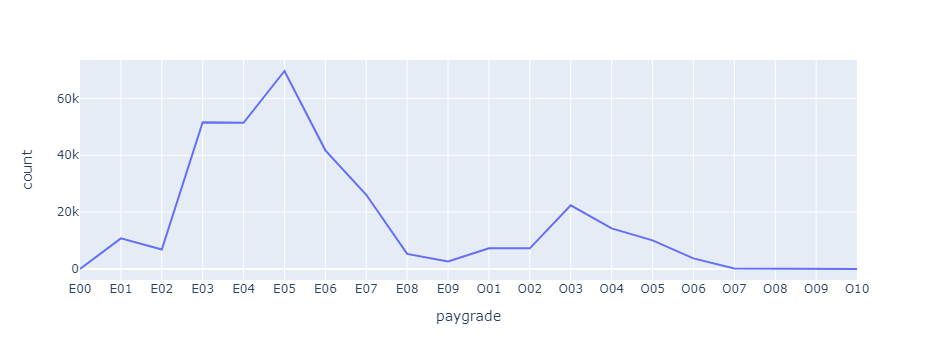

In [58]:
# Calculate the total count by paygrade
total_counts_by_paygrade = air_force_nz.groupby("paygrade").sum().reset_index()

# Draw a line plot of count vs. paygrade
fig = px.line(total_counts_by_paygrade, x ="paygrade", y = "count")
fig.show()